In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [77]:
import pandas as pd
import re
import spacy
from spacy import displacy
zlp = spacy.load('zh_core_web_lg')
elp = spacy.load('en_core_web_lg')

In [110]:
df = pd.concat([pd.read_csv("./xinhua_scores.csv"), pd.read_csv("./xinhua_scores3.csv"), pd.read_csv("./xinhua_scores1.csv")], ignore_index=True)
df = df.drop_duplicates(subset=['zho'], keep='first')
df = df[df["zho"] != "\n"]

In [138]:
df = pd.read_csv("./final_xinhua_scores.csv")
df

,zho,eng,zho_reverse,zho_eng_jaccard,eng_zho_jaccard,zh_nsubjs,en_nsubjs,rev_nsubjs
0,“只要胡同存在一天，它便是个有机体，有生命、有感情，他会思念远人，远人也会思念它\n,"The day a vacuum exists, it's an organic body,...","假存在的那一天,它是一个有机的身体,它活着,它是情感的,它会想到人们,人们会想到它.",0.142857,0.714286,3,6,5
1,”展览结语中，学者邓云乡的话令人回味悠长\n,The words of the scholar Liu Yun-Keng are a re...,云的言论提醒我们中国展览的悠久历史.,0.571429,0.571429,1,1,1
2,（记者董素玉 丁静 郭宇靖）\n,"(Journalist Dong Sun Yue, Ding Shih, Gu Yu-Yun)","记者唐孙,丁希,郭玉云",0.750000,0.750000,0,0,1
3,为此，有关部门将开展规划实施监督，强化对严守空间安全底线等的监督检查，坚决维护规划的权威...,"To this end, relevant departments will impleme...","为此,有关部门将实施监督规划和实施,加强监督检查,严格遵守空间安全基线,并强烈维持规划的权威...",0.090909,0.636364,1,1,2
4,自然资源部有关负责人强调，要强化规划权威\n,The Ministry of Natural Resources's relevant h...,自然资源部有关负责人强调加强规划权力.,0.166667,0.666667,1,1,1
...,...,...,...,...,...,...,...,...
1269,【记者观察】就业是最大的民生\n,The report also noted that the number of peopl...,"第四,以优化技术创新平台的基础,重点优化一系列技术创新平台的建设,促进生态系统研究和基础设施...",0.111111,0.666667,2,2,0
1270,各地各部门要抓好节后用工关键窗口期，用“真金白银”援企稳岗，以产业升级扩大就业空间，延续开工...,The key window period for the sector to use th...,"五是高层技术人才领导升级行动,重点是加强生态系统和技术人才群.",0.857143,0.714286,1,2,0
1271,经回看当日赛场视频，证实秦思玥当天凌晨进入赛场藏匿手机，在比赛过程中用手机使用人工智能程...,"After reviewing the video of the race, it was ...",报道者张齐,0.100000,0.200000,3,2,0
1272,蔡奇表示，习近平总书记同通伦总书记共同签署构建中老命运共同体新的五年行动计划以来，中老关...,Liu said that China's relations have been deve...,"从包括资产重组项目账户,到获得过期特殊债券资金支持,到申请长期低利率资产重组项目贷款,到完成...",0.111111,0.777778,4,3,0


In [139]:
print(np.mean(df["eng_zho_jaccard"]), np.mean(df["zho_eng_jaccard"]))

0.6369927356441024 0.4409376857461771


-0.13108320251177394 1.3120349531746733 0.4988833259524731
-0.12637362637362637 1.247494772470854 0.49886774960101965


Text(0, 0.5, 'frequency')

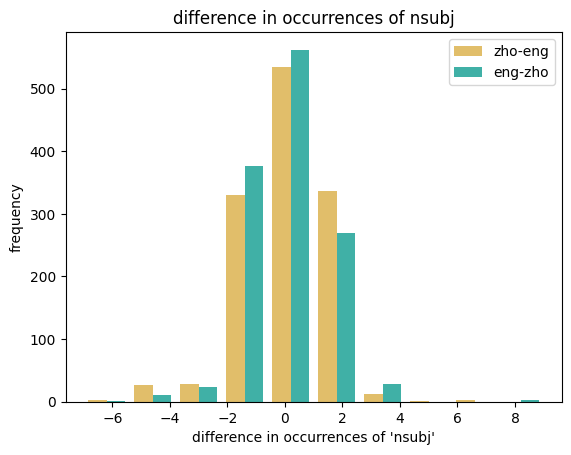

In [164]:
zh_en_ndiff = df["en_nsubjs"] - df["zh_nsubjs"]
rev_ndiff = df["rev_nsubjs"] - df["en_nsubjs"]
print(np.mean(zh_en_ndiff), np.std(zh_en_ndiff), stats.norm.sf(abs(np.mean(zh_en_ndiff)/np.std(zh_en_ndiff)/np.sqrt(len(zh_en_ndiff)))))
print(np.mean(rev_ndiff), np.std(rev_ndiff), stats.norm.sf(abs(np.mean(rev_ndiff)/np.std(rev_ndiff)/np.sqrt(len(rev_ndiff)))))
fig, axes = plt.subplots()
axes.hist([zh_en_ndiff, rev_ndiff], color=['#E1BE6A', '#40B0A6'])
axes.set_xlabel("difference in occurrences of 'nsubj'")
axes.set_title("difference in occurrences of nsubj")
axes.legend(["zho-eng", "eng-zho"])
axes.set_ylabel("frequency")
#axes[0, 1].hist(zh_en_ndiff)

0.4409376857461771 0.3101423712661025
0.6369927356441024 0.19192307128619804


Text(0, 0.5, 'similarity')

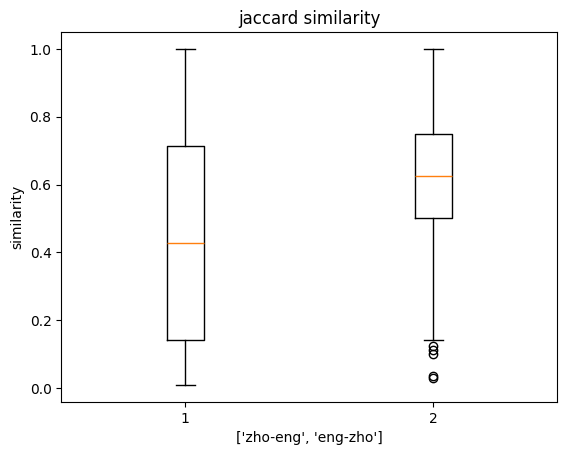

In [141]:
zho_eng_jaccard = df["zho_eng_jaccard"]
eng_zho_jaccard = df["eng_zho_jaccard"]
print(np.mean(zho_eng_jaccard), np.std(zho_eng_jaccard))
print(np.mean(eng_zho_jaccard), np.std(eng_zho_jaccard))
fig, axes = plt.subplots()
axes.boxplot([zho_eng_jaccard, eng_zho_jaccard])
axes.set_title("jaccard similarity")
axes.set_xlabel(["zho-eng", "eng-zho"])
axes.set_ylabel("similarity")
#axes[0, 1].hist(zh_en_ndiff)

0.27629513343799056 0.30376766091051804 0.41993720565149134
0.23547880690737832 0.32339089481946626 0.4411302982731554


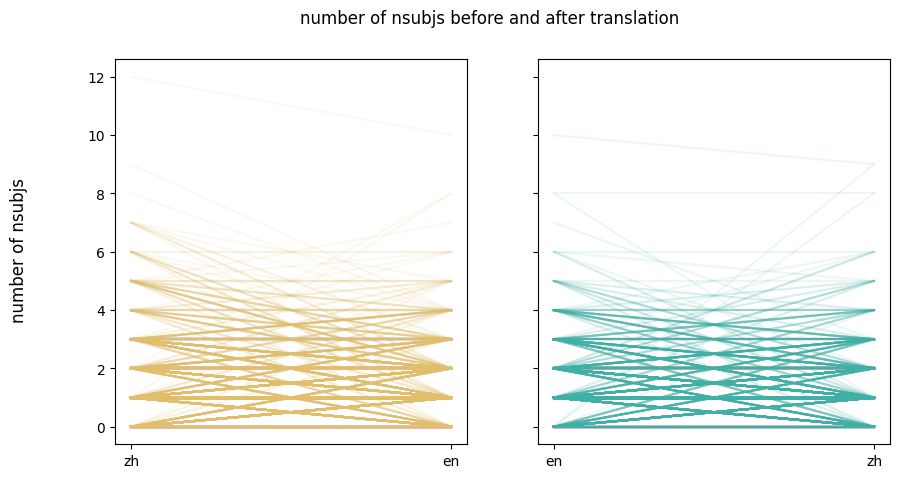

In [ ]:
zh_eng_inc = 0
zh_eng_dec = 0
zh_eng_const = 0
rev_inc = 0
rev_dec = 0
rev_const = 0

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10, 5), sharey = True)
for index, row in df.iterrows():
    x = ["zh", "en"]#, "reverse"]
    ls = [row["zh_nsubjs"], row["en_nsubjs"]]#, row["rev_nsubjs"]]
    if ls[1] > ls[0]:
        axes[0].plot(x, ls, color='#E1BE6A', linestyle = '-', alpha=0.1)
        zh_eng_inc += 1
    elif ls[1] < ls[0]:
        axes[0].plot(x, ls, color='#E1BE6A', linestyle = '-', alpha=0.1)
        zh_eng_dec += 1
    else:
        axes[0].plot(x, ls, color='#E1BE6A',linestyle = '-', alpha=0.1)
        zh_eng_const +=1

for index, row in df.iterrows():
    x = ["en", "zh"]#, "reverse"]
    ls = [row["en_nsubjs"], row["rev_nsubjs"]]#, row["rev_nsubjs"]]
    if ls[1] > ls[0]:
        axes[1].plot(x, ls, color='#40B0A6', linestyle = '-', alpha=0.1)
        rev_inc += 1
    elif ls[1] < ls[0]:
        axes[1].plot(x, ls, color='#40B0A6', linestyle = '-', alpha=0.1)
        rev_dec += 1
    else:
        axes[1].plot(x, ls, color='#40B0A6',linestyle = '-', alpha=0.1)
        rev_const +=1

fig.supylabel("number of nsubjs")
fig.suptitle('number of nsubjs before and after translation')
n_samples = len(df)
print(zh_eng_inc/n_samples, zh_eng_dec/n_samples, zh_eng_const/n_samples)
print(rev_inc/n_samples, rev_dec/n_samples, rev_const/n_samples)


In [165]:
diffs = []
add_nsubjpass = 0

for idx, row in df.iterrows():
    if row["en_nsubjs"] != row["zh_nsubjs"]:
        diffs.append(row["en_nsubjs"] - row["zh_nsubjs"])
        print(row["zho"], row["eng"])

print(np.mean(diffs), np.std(diffs), stats.norm.sf(abs(np.mean(diffs)/np.std(diffs)/np.sqrt(len(diffs)))))


  “只要胡同存在一天，它便是个有机体，有生命、有感情，他会思念远人，远人也会思念它
 The day a vacuum exists, it's an organic body, it's alive, it's emotional, and it's going to think about people, and people will think about it.
规划一经批复，任何部门和个人不得随意修改、违规变更，防止出现换一届党委和政府改一次规划
 The plan, once criticized, must not be modified or altered by any department or individual to prevent another Party Committee or Government from changing the plan.
加强规划与土地政策融合，统筹增量和存量空间，大力盘活存量空间，科学有序推进低效用地再开发和土地综合整治，加强地上地下空间一体化规划和利用，推动土地利用提质增效，为城市转型发展和有机更新提供新动能
 Strengthen planning and land policy integration, consolidate growth and storage space, intensify the use of live storage space, advance scientifically the efficient development of inefficient land and land integrated rehabilitation, strengthen the integration of land and underground space planning and utilization, promote the increased efficiency of land use, and provide renewable energy for urban transformation and organic renewal.
  据介绍，本轮规划将严格落实国家和省级国土空间规划下达的耕地和永久基本农田、生态保护红线、城镇开发边界三条控制线，将其作为调整经济

0
0.09265734265734266 1.6161819165802624 0.49904368441574315
-0.3776223776223776 1.2560577455668758


Text(0, 0.5, 'frequency')

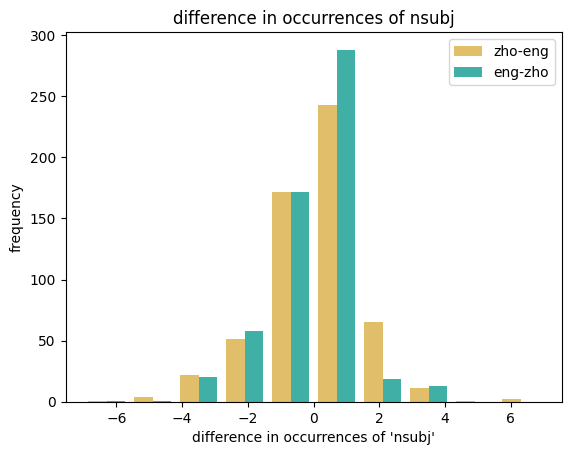

In [167]:
print(add_nsubjpass)
idxs = []
add_nsubjpass = 0


for idx, row in df.iterrows():
    if len([token for token in zlp(row["zho"]) if token.dep_ == 'nsubjpass']) < len([token for token in elp(row["eng"]) if token.dep_ == 'nsubjpass']):
        add_nsubjpass+=1
    elif row["en_nsubjs"] != row["zh_nsubjs"]:
        idxs.append(idx)
    

df2 = df.iloc[idxs]

zh_en_ndiff = df2["en_nsubjs"] - df2["zh_nsubjs"]
rev_ndiff = df2["rev_nsubjs"] - df2["en_nsubjs"]
print(np.mean(zh_en_ndiff), np.std(zh_en_ndiff), stats.norm.sf(abs(np.mean(zh_en_ndiff)/np.std(zh_en_ndiff)/np.sqrt(len(zh_en_ndiff)))))
print(np.mean(rev_ndiff), np.std(rev_ndiff))
fig, axes = plt.subplots()
axes.hist([zh_en_ndiff, rev_ndiff], color=['#E1BE6A', '#40B0A6'])
axes.set_xlabel("difference in occurrences of 'nsubj'")
axes.set_title("difference in occurrences of nsubj")
axes.legend(["zho-eng", "eng-zho"])
axes.set_ylabel("frequency")



In [158]:
print(np.mean(zh_en_ndiff), np.std(zh_en_ndiff), np.mean(zh_en_ndiff)/np.std(zh_en_ndiff)/np.sqrt(len(zh_en_ndiff)))

0.09265734265734266 1.6161819165802624 0.0023971299787106603


In [82]:
import nltk
from nltk.grammar import CFG
from nltk.parse import RecursiveDescentParser

def get_root(doc):
    curr = doc[0]
    while curr.head != curr:
        curr = curr.head
    return curr


def to_nltk_tree(node):
    if len(list(node.children)) > 0:
        return nltk.Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_
    
def to_nltk_dep_tree(node):
    if len(list(node.children)) > 0:
        return nltk.Tree(node.dep_, [to_nltk_dep_tree(child) for child in node.children])
    else:
        return node.dep_
    
class Node:
    def __init__(self, label, children=None):
        self.label = label
        self.children = children if children else []

    def get_children(node):
        return node.children

    def get_label(node):
        return node.label
    
    def complex_distance(token1, token2):
        return 0 if set(token1.children) == set(token2.children) else (len(token1.children))

def doc_to_tree(root):
    children = list(root.children)
    if len(children) == 0:
        return Node(root.dep_, [])
    else:
        return Node(root.dep_, [doc_to_tree(child) for child in children])

def pronoun_mask(tree):
    if tree.label != 'nsubj':
        tree.label = 0
    else:
        tree.label = 1
    children = tree.get_children()
    if len(children) > 0:
        for child in children: child = pronoun_mask(child)
    return tree

def collapse_pronouns(root):
    children = root.get_children()
    leaf_sum = 0
    branches = []
    for child in children:
        if not child.get_children():
            leaf_sum += child.get_label()
        else:
            branches.append(collapse_pronouns(child))
    return Node(root.get_label(), [Node(leaf_sum)]+branches) if root.get_children() else Node(root.get_label())

def tree_to_set(root):

    def helper(root, level):
        level = level
        elems = []
        children = root.get_children()
        labels = [child.get_label() for child in children]
        for child in children:
            elems.append((level, root.get_label(), child.get_label()))
            elems += helper(child, level + 1)
        return elems
    
    return [(0, -1, root.get_label())] + helper(root, 1)


In [143]:
doc1 = zlp("以水为笔，美丽中国新画卷正徐徐铺展")
doc2 = elp("The beautiful new Chinese painting is being laid out in water with a pen.")

z_tree = to_nltk_tree(get_root(doc1))
z_dep = to_nltk_dep_tree(get_root(doc1))
e_tree = to_nltk_tree(get_root(doc2))
e_dep = to_nltk_dep_tree(get_root(doc2))
z_tree.pretty_print()
z_dep.pretty_print()
e_tree.pretty_print()
e_dep.pretty_print()

             铺展                    
  ___________|_______________       
 |   |       为               画卷    
 |   |    ___|_______     ___|___   
 正   徐徐  以水  笔   ，   美丽  中国      新 

                    ROOT                          
   __________________|____________________         
  |      |          dep                 nsubj     
  |      |       ____|__________     _____|____    
advmod advmod nsubj dobj punct dep nmod       amod

                  laid                                 
  _________________|________________________________    
 |    |    |   |           |                   |   with
 |    |    |   |           |                   |    |   
 |    |    |   |        painting               in  pen 
 |    |    |   |    _______|____________       |    |   
 is being out  .  The  beautiful new Chinese water  a  

                      ROOT                              
  _____________________|_____________________________    
 |     |     |    |            |                